In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv')
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [35]:
X = data.iloc[:,:20].values
y = data.iloc[:,20:].values

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values. 

In [24]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [36]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
y = oh_encoder.fit_transform(y).toarray()

In [37]:
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

Building the Neural Network using Keras

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [49]:
model = Sequential()
model.add(Dense(16,input_dim=20,activation='relu'))
model.add(Dense(12,input_dim=16,activation='relu'))
model.add(Dense(4,input_dim=12,activation='softmax'))

In [50]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

Here loss is __"cross entropy loss"__. Categorical_crossentropy specifies that we have multiple classes. The Optimizer is __"Adam"__. Metrics is used to specify the way we want to judge the performance of our neural network. Here we have specified it to accuracy.

In [52]:
history = model.fit(X_train,y_train,epochs=1600,batch_size=64)

Epoch 1/1600
29/29 [==============================] - 0s 3ms/step - loss: 0.6349 - accuracy: 0.7361
Epoch 2/1600
29/29 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7650
Epoch 3/1600
29/29 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7611
Epoch 4/1600
29/29 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7983
Epoch 5/1600
29/29 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7611
Epoch 6/1600
29/29 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.7956
Epoch 7/1600
29/29 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7933
Epoch 8/1600
29/29 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7617
Epoch 9/1600
29/29 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.7383
Epoch 10/1600
29/29 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7672

Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.

In [55]:
y_pred = model.predict(X_test)
y_pred

array([[9.66523468e-01, 3.34764905e-02, 1.53046617e-10, 4.07120435e-22],
       [1.75580033e-06, 1.48637369e-01, 8.41595113e-01, 9.76570044e-03],
       [4.67049927e-02, 9.51966643e-01, 1.32835994e-03, 4.05391765e-09],
       [2.23489431e-16, 1.40850557e-06, 6.13851510e-02, 9.38613474e-01],
       [6.41096791e-04, 9.99355137e-01, 3.72690033e-06, 9.12638190e-16],
       [1.03254640e-03, 9.33751941e-01, 6.51820377e-02, 3.35139484e-05],
       [2.55795413e-07, 2.05096260e-01, 7.92073965e-01, 2.82953493e-03],
       [9.79888976e-01, 2.01110300e-02, 1.36925779e-12, 1.34463079e-25],
       [2.79735346e-10, 4.62071924e-03, 4.27137673e-01, 5.68241656e-01],
       [1.16643088e-04, 5.93212485e-01, 4.06233728e-01, 4.37099079e-04],
       [9.97771263e-01, 2.22881604e-03, 1.62165840e-13, 2.39924710e-26],
       [2.19830871e-01, 7.79567719e-01, 6.01416454e-04, 4.33137259e-09],
       [5.36288280e-06, 2.11169243e-01, 7.88275898e-01, 5.49521938e-04],
       [3.67832665e-19, 1.83225417e-08, 9.93309822e

In [56]:
y_test

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],


In [58]:
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [60]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print("The accuraacy is : ",a*100)

The accuraacy is :  88.5


In [65]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 10ms/step - loss: 0.1387 - accuracy: 0.9461 - val_loss: 0.1931 - val_accuracy: 0.9450
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.2043 - accuracy: 0.9100 - val_loss: 0.2477 - val_accuracy: 0.9000
Epoch 3/100
29/29 [==============================] - 0s 8ms/step - loss: 0.1437 - accuracy: 0.9417 - val_loss: 0.1527 - val_accuracy: 0.9650
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1267 - accuracy: 0.9550 - val_loss: 0.1566 - val_accuracy: 0.9500
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 0.1070 - accuracy: 0.9700 - val_loss: 0.1785 - val_accuracy: 0.9300
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 0.1090 - accuracy: 0.9683 - val_loss: 0.1997 - val_accuracy: 0.9150
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 0.1473 - accuracy: 0.9389 - val_loss: 0.1645 - val_accuracy: 0.9400
Epoch 8/100


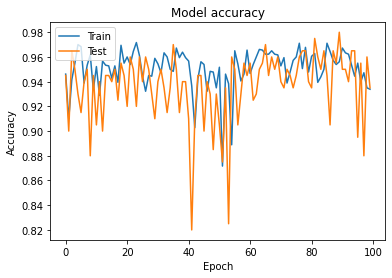

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

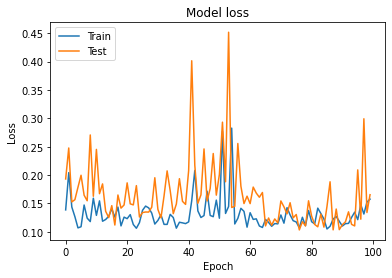

In [67]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()